In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'
df = pd.read_csv(url)

### Pre-processing

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
# Key and Values

# Status = ("ok", "default")
# Home = ("rent", "owner", "priv", "ignore", "parents", "other")
# Marital = ("single", "married", "widow", "separated", "divorced")
# Records = ("no_rec", "yes_rec")
# Job = ("fixed", "partime", "freelance", "others")

In [7]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

In [8]:
df.marital.value_counts()

married      3241
single        978
separated     130
widow          67
divorced       38
unk             1
Name: marital, dtype: int64

In [9]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,3,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,1,46,107,0,0,310,910


In [10]:
df.describe().round()

,seniority,time,age,job,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
df.income.max()

99999999

In [12]:
for i in ['income', 'assets', 'debt']:
    df[i]=df[i].replace(99999999, np.nan)

In [13]:
df.describe().round()

,seniority,time,age,job,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,2.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,1.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,1.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,3.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,4.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [14]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [15]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df=df.copy()
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [18]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,3,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,1,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,3,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,1,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,1,46,107.0,0.0,0.0,310,910


In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = (df_train.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

In [21]:
del(df_train['status'])
del(df_val['status'])
del(df_test['status'])

### Decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [23]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [24]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [27]:
y_pred = dt.predict_proba(X_val)[:,1]

In [28]:
roc_auc_score(y_val, y_pred)

0.6481618270325253

In [29]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

In [30]:
# overfitting occurs probably because of an infinite depth of trees
# specifying depth...

In [31]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)
# we have a better model

train: 0.7274153568813024
val: 0.6894934731539561


In [33]:
print(export_text(dt, feature_names = dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- seniority <= 2.50
|   |   |--- class: 0
|   |--- seniority >  2.50
|   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



### Decision tree parameter tuning

In [34]:
# max_depth
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.689
   3 -> 0.742
   4 -> 0.747
   5 -> 0.746
   6 -> 0.742
  10 -> 0.661
  15 -> 0.649
  20 -> 0.666
None -> 0.664


In [35]:
# 4,5,6 are good max_depths

In [36]:
# min_samples_leaf
scores=[]

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

In [37]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values('auc', ascending = False).head()
# max_depth of 6 and min_samples_leaf of 20 gives highest auc

,max_depth,min_samples_leaf,auc
23,6,20,0.776004
24,6,100,0.773843
15,5,100,0.766108
22,6,15,0.765000
14,5,20,0.759563


In [38]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values = ['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.747  0.746  0.743
2                 0.747  0.746  0.755
5                 0.747  0.748  0.746
10                0.747  0.747  0.758
15                0.750  0.755  0.765
20                0.750  0.760  0.776
100               0.748  0.766  0.774
200               0.738  0.745  0.749
500               0.679  0.679  0.679

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

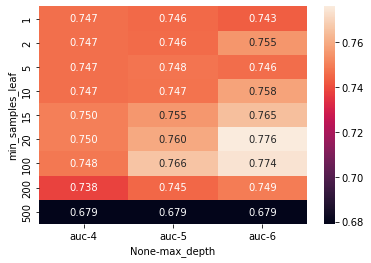

In [39]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [40]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

### Ensembles and Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [43]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7812598387057712

In [44]:
roc_auc_score(y_val, y_pred)

0.7812598387057712

In [45]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [46]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores.head()

,n_estimators,auc
0,10,0.781260
1,20,0.798470
2,30,0.803907
3,40,0.812574
4,50,0.815756


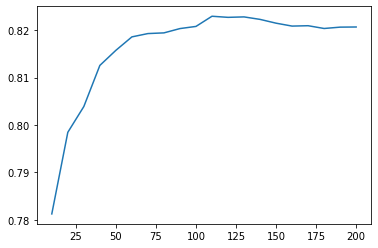

In [47]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [48]:
#add max_depth

scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [49]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.794695
1,5,20,0.799130
2,5,30,0.796569
3,5,40,0.797695
4,5,50,0.797592


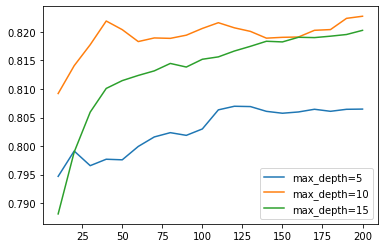

In [50]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [51]:
# best max depth is 10
max_depth = 10
# checking for min_samples_leaf

In [52]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [53]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

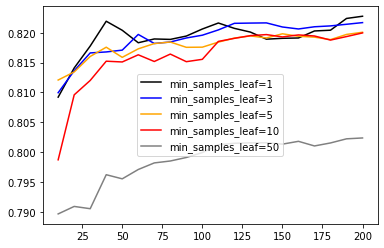

In [54]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [55]:
# let's go with min_samples_leaf as 3
min_samples_leaf = 3

In [56]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

### Gradient boosting and XGBoost

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
import xgboost as xgb

In [60]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [61]:
xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 1,
    
    'objective': 'binary:logistic',
    'nthread' : 8,
    
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [62]:
y_pred = model.predict(dval)

In [63]:
roc_auc_score(y_val, y_pred)

0.8163492044271148

In [64]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [65]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [66]:
s = output.stdout

In [67]:
print(s[:200])

[0]	train-auc:0.86699	val-auc:0.76631
[5]	train-auc:0.93037	val-auc:0.80967
[10]	train-auc:0.95093	val-auc:0.81914
[15]	train-auc:0.96481	val-auc:0.82177
[20]	train-auc:0.97634	val-auc:0.82125
[25]	tr


In [68]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
        
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [69]:
df_score = parse_xgb_output(output)

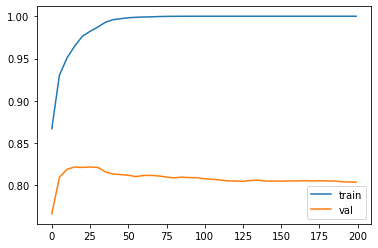

In [70]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# at about the 60th iter we start overfitting

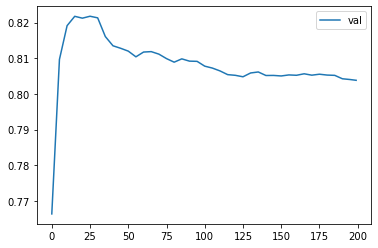

In [71]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

### XGBoost parameter tuning

In [72]:
# here we tune the eta, max_depth, min_child_weight paramneters

### Tuning eta

In [73]:
scores = {}
# run and capture output for eta = 1, 0.3, 0.1, 0.05, 0.01
# note: code was overwritten and stored in "scores"

In [83]:
%%capture output

xgb_params = {
    'eta': 1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [84]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1'

In [85]:
scores['eta=0.01'].head()

,num_iter,train_auc,val_auc
0,0,0.86699,0.76631
1,5,0.86896,0.76663
2,10,0.87728,0.77201
3,15,0.88307,0.77804
4,20,0.88682,0.78311


In [86]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1'])

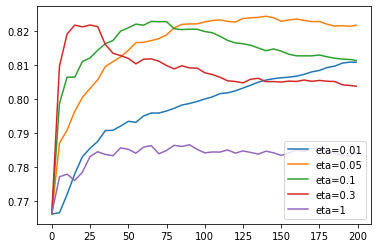

In [87]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

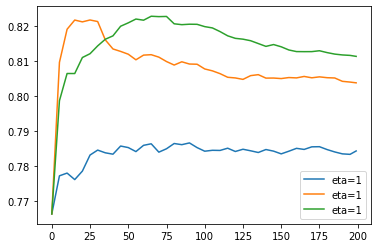

In [88]:
etas = ['eta=1', 'eta=0.3', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

# at closer look,  eta = 0.1 is best

In [89]:
# with eta = 0.1, we tune max_depth parameter with 3,4 and 6 
scores = {}

In [94]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [95]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [96]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6'])

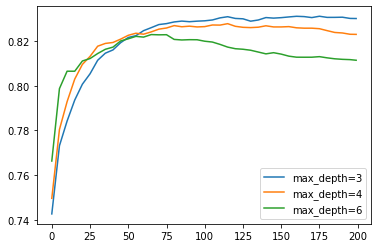

In [97]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

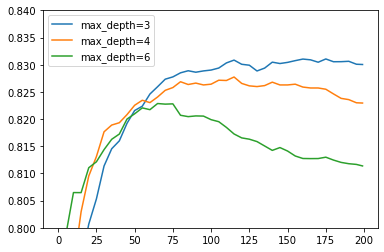

In [98]:
# zooming in

for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

# best max_depth is 3

In [99]:
# with eta = 0.1, max_depth = 3, we tune min_child_weight at 1, 10, 30
scores = {}

In [104]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [105]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [106]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

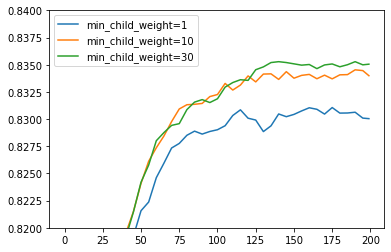

In [107]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

In [108]:
# we train the model with eta = 0.1, max_depth = 3, min_child_weight = 30, num_boost_round = 175

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

### Selecting the best model

In [109]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [110]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7651031701823642

In [111]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [112]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8216832966021652

In [113]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [114]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8304927223850235

In [115]:
# xgboost is the best model

In [ ]:
Using xgboost as final model

In [323]:
df_full_train = df_full_train.copy()
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no,1,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no,3,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no,1,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no,4,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no,1,35,253.0,7000.0,0.0,1060,1750


In [331]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [336]:
del df_full_train['status']

In [341]:
dicts_full_train = df_full_train.to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient = 'records')
X_test = dv.transform(dicts_test)

In [345]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [343]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [346]:
y_pred = model.predict(dtest)

In [347]:
roc_auc_score(y_test, y_pred)

0.8321013146962514